In [53]:
# build a simple linear regression in python
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
import scipy as sp
plt.style.use('seaborn')

# Simple Linear Regression

**Regression analysis** is a tool to investigate how independent variables are related to a dependent varliable. For example, one may wish to use a person's height, gender, race, etc. to predict a person's weight. 


**Response Variable**
- Denoted, Y, is also called the target variable  or dependent variable. In the example, weight is the response variable.

**Predictor Variable**
- Denoted, X, is also called the explanatory variable or independent variable. In the example, height is the predictor.



To use known information to provide a better estimate, we need to understand how the dependent and independent variables are related. In statistics, we can describe how variables are related using a mathematical function. The function along with other assumptions is called a model.  

In this class, we will focus on a model where we use one predictor variable(height) to predict the response variable(weight). We refer to this model as the simple linear regression model.

In [54]:
#read in height weight data
weight_df = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/nyc-mhtn-ds-071519-lectures/master/week-1/Descriptive_Statistics/weight-height.csv')

In [55]:
#read in movie data
movie_df = pd.read_csv('cleaned_movie_data.csv', index_col=0)

In [56]:
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,Other,PG,PG-13,R
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,2009.0,936.0,7.9,33000,PG-13,0,0,0,1,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,2007.0,5000.0,7.1,0,PG-13,0,0,0,1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,2015.0,393.0,6.8,85000,PG-13,0,0,0,1,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2012.0,23000.0,8.5,164000,PG-13,0,0,0,1,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,2012.0,632.0,6.6,24000,PG-13,0,0,0,1,0


## Objectives: 

- Use plots and summary statistics to describe the relationship between the response variable and the predictor variable.
- Apply the regression model and interpret the results.
- Perform a hypothesis test for the population correlation.
- Know the assumptions and limitations of a linear regression model.


## Setting the stage
In order to create a model that can make predictions for unseen data, we need to understand the relationship between the target variable and the explanatory variable.

For a brief review of linear functions, recall that the equation of a line has the following form:
$$y=mx+b$$

where $m$ is the slope and $b$ is the y-intercept.



<img src="https://www.mathworks.com/help/symbolic/mupad_ug/math-statistics-fits-linear-36e42cfe.png" >

Given two points on a line, ($x_1$ and $y_1$) and ($x_2$ and $y_2$) , the slope is calculated by:

\begin{align} m&=\dfrac{y_2-y_1}{x_2-x_1}\\&=\dfrac{\text{change in y}}{\text{change in x}}\\&=\frac{\text{rise}}{\text{run}} \end{align}

In order to be confident that our model will represent the relationship between two variables, we need to be sure there is a linear relationship between the two.  Let's examine the data for a linear relationship.

### Question:

If we want to visually examine if there is relationship between two continuous variables what type of graphic should we use?

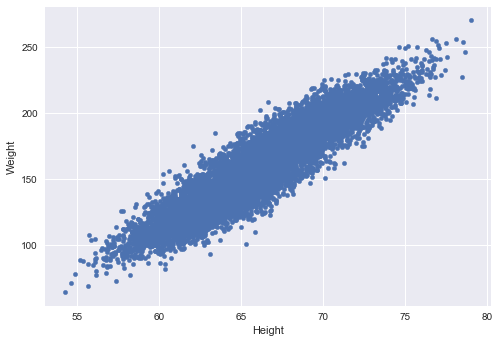

In [57]:
##code for a ____

weight_df.plot.scatter(x='Height', y='Weight')

In [58]:
movie_df = movie_df[movie_df['budget']<350000000]

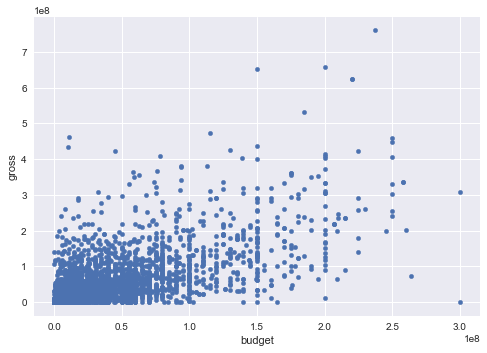

In [59]:
#create a scatterplot of the budget and gross for the movie df
movie_df.plot.scatter(x='budget', y='gross')

<img src='http://www.cqeacademy.com/wp-content/uploads/2018/06/Scatter-Plots-and-Correlation-Examples.png' width="900">

### Question:  

If we want to provide a measure of the strength of the linear relationship between two quantitative variables, what is the name of the measure we would like to use?



### Sample Correlation Coefficient

The sample correlation coefficient is typically denoted as $r$. It is also known as Pearson’s $r$. The population correlation coefficient is generally denoted as  $\rho_1$, pronounced “rho.”


The sample correlation coefficient, $r$, is calculated using the following formula:

$$r=\dfrac{\sum (x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum (x_i-\bar{x})^2}\sqrt{\sum (y_i-\bar{y})^2}}$$

In [60]:
#calculate correlation coefficient for data
# 0.0 the probabilty that their is no replationhip ;thus there is a relationship
pearsonr(weight_df['Weight'], weight_df['Height'])

(0.9247562987409147, 0.0)

In [61]:
#calculate correlation coefficient for the movie df
pearsonr(movie_df['budget'], movie_df['gross'])

(0.6360241184013687, 0.0)

## Simple Linear Regression Model

The general form of the simple linear regression model is...

$$Y=\beta_0+\beta_1X+\epsilon$$

For an individual observation,

$$y_i=\beta_0+\beta_1x_i+\epsilon_i$$

where,

$\beta_0$ is the population y-intercept,

$\beta_1$ is the population slope, and

$\epsilon_i$ is the error or deviation of $y_i$ from the line, $\beta_0+\beta_1x_i$.

<img src="https://www.stevejburr.com/post/2019-03-27-scatter-plots-and-best-fit-lines_files/figure-html/unnamed-chunk-2-1.png" >

How do we know which line is the best fit?

**It is the line that minimizes our errors, also called residuals.**

### Residual
$\hat{\epsilon}_i=y_i-\hat{y}_i$ is the observed error, typically called the residual.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToATqP0jQd-VRjdo8cxNwfcqKoM3cw3b6FembVLP1ExpNLZbW0" width="500">

### Least Squares Line
The least squares line is the line for which the sum of squared errors of predictions for all sample points is the least.

$$SSR = \sum_{i=1}^n (\hat{y} - \bar{yi})^2$$

## Fitting a Model in Python



In [62]:
# building a linear regression model using statsmodel 
lr_model = ols(formula='Weight~Height', data=weight_df).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Thu, 15 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:17:11   Log-Likelihood:                -39219.
No. Observations:               10000   AIC:                         7.844e+04
Df Residuals:                    9998   BIC:                         7.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -350.7372      2.111   -166.109      0.000    -354.876    -346.598
Height         7.7173      0.032    242.975      0.000       7.655       7.780
==============================================================================
Omnibus:                        2.141   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.150
Skew:                           0.036   Prob(JB):                        0.341
Kurtosis:                       2.991   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Applied:
    
Fit a simple linear model to predict the gross of a film as a function of its budget. Then write a sentence to that will interpret the coefficient of the independent variable and the intercept of the model. 

In [64]:
movie_df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,rating,G,Other,PG,PG-13,R
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,2009.0,936.0,7.9,33000,PG-13,0,0,0,1,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,2007.0,5000.0,7.1,0,PG-13,0,0,0,1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,2015.0,393.0,6.8,85000,PG-13,0,0,0,1,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2012.0,23000.0,8.5,164000,PG-13,0,0,0,1,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,2012.0,632.0,6.6,24000,PG-13,0,0,0,1,0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,2007.0,11000.0,6.2,0,PG-13,0,0,0,1,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,2010.0,553.0,7.8,29000,PG,0,0,1,0,0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,2015.0,21000.0,7.5,118000,PG-13,0,0,0,1,0
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,2009.0,11000.0,7.5,10000,PG,0,0,1,0,0
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,2016.0,4000.0,6.9,197000,PG-13,0,0,0,1,0


In [65]:
# your code here
lr_movie = ols(formula='budget~gross', data=movie_df).fit()

lr_movie.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 budget   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     2814.
Date:                Thu, 15 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:18:04   Log-Likelihood:                -77532.
No. Observations:                4144   AIC:                         1.551e+05
Df Residuals:                    4142   BIC:                         1.551e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.919e+07   6.15e+05     31.177      0.000     1.8e+07    2.04e+07
gross          0.3886      0.007     53.045      0.000       0.374       0.403
==============================================================================
Omnibus:                     1246.157   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7043.982
Skew:                           1.316   Prob(JB):                         0.00
Kurtosis:                       8.820   Cond. No.                     1.03e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# the standard error is the interval to which we can predict

## Interpreting the Model output

### Interpreting the slope of the regression equation,  $\hat{\beta}_1$ 
$\hat{\beta}_1$ represents the estimated increase in $Y$ per unit increase in $X$. Note that the increase may be negative which is reflected when $\hat{\beta}_1$ is negative.
 
### Interpreting the intercept of the regression equation, $\hat{\beta}_0$
$\hat{\beta}_0$ is the -intercept of the regression line. When $X=0$ is within the scope of observation, $\hat{\beta}_0$ is the estimated value of $Y$ when $X=0$ .

In [70]:
## write a sentence that interprets the variable coefficient
#               y-intercept
y = (1.0410*x)+(8.09*(10**6))

NameError: name 'x' is not defined

In [71]:
y = (1.0410*(10*10**6))+(8.09*(10**6))
y # gross prediction

18500000.0

***Can you take the take the output of model summary and use it to rewrite the model with actual values?***

(*Replace the betas with numbers*)


In [ ]:
## write model here.




### Why is there a p-value for the coefficient

If we think about linear regression as a way to test if there is a relationship between two variables, then we can translate it to a hypothesis test:

$H_0\colon \beta_1=0$ i.e. no relatonship between the two variables

$H_a\colon \beta_1\ne0$ i.e. there is a relationship

With this in mind, how would you interpret the p-value in this output?

In [ ]:
## write your sentence here
#There is a relationship since p-value is zero or very low. So we van reject H0.


##  Coefficient of Determination ($R^2$)

The _coefficient of determination_, is a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $y = \mu_Y$, for dependent variable $Y$.

The actual calculation of $R^2$ is: <br/> $$\Large R^2=\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$$.

$R^2$ takes values between 0 and 1.

$R^2$ is a measure of how much variation in the dependent variable your model explains.


<img src='https://pbs.twimg.com/media/D-Gu7E0WsAANhLY.png' width ="700">

***Write a sentence interpreting the $R^2$ value from your movie model***

In [ ]:
# sentence here
# VERY IMPORTANT!!!!!!!!!!!!!!
# our model explains the percentage 40% of variation on our target. 
# R_squared = 0.405
# R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable 
# that's explained by an independent variable or variables in a regression model. Whereas correlation explains the 
# strength of the relationship between an independent and dependent variable, R-squared explains to what extent the 
# variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, 
# then approximately half of the observed variation can be explained by the model's inputs.

### Assumptions for Simple Linear Regression
1. **Linearity**: The relationship between $X$ and $Y$ must be linear.
    - Check this assumption by examining a scatterplot of x and y.


2. **Independence of errors**: There is not a relationship between the residuals and the $Y$ variable; in other words, $Y$ is independent of errors.
    - Check this assumption by examining a scatterplot of “residuals versus fits”; the correlation should be approximately 0. In other words, there should not look like there is a relationship.


3. **Normality of errors**: The residuals must be approximately normally distributed.
    - Check this assumption by examining a normal probability plot; the observations should be near the line. You can also examine a histogram of the residuals; it should be approximately normally distributed.


4. **Equal variances**: The variance of the residuals is the same for all values of $X$.
    - Check this assumption by examining the scatterplot of “residuals versus fits”; the variance of the residuals should be the same across all values of the x-axis. If the plot shows a pattern (e.g., bowtie or megaphone shape), then variances are not consistent, and this assumption has not been met.

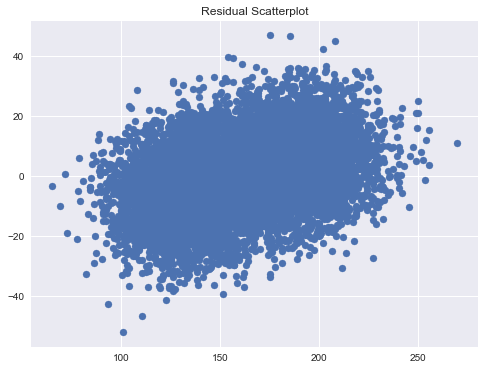

In [72]:
# checking for our model - Homoscedasticity,  Independence of residuals
pred_val = lr_model.fittedvalues.copy()
true_val = weight_df['Weight'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(weight_df['Weight'],residual)
ax.set_title('Residual Scatterplot')
plt.show()

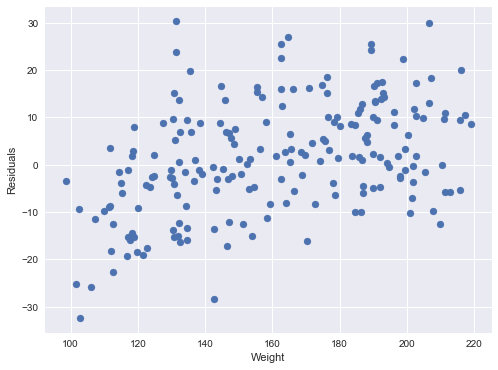

In [74]:
#taking a sample of the observations to more clearly evaluate the residuals
idx = np.random.choice(np.arange(len(pred_val)), 200, replace=False)
x_sample = weight_df['Weight'][idx]
y_sample = residual[idx]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(x_sample,y_sample)
ax.set_xlabel('Weight')
ax.set_ylabel('Residuals')

plt.show()

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([-51.93373047, -46.70036118, -42.55403182, ...,  45.14088139,
          46.64602725,  46.84388996])),
 (12.221424481473658, 1.1562731074769355e-13, 0.9998756760091048))

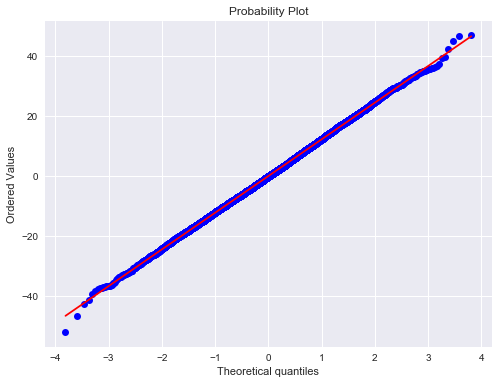

In [75]:
# checking for normality - QQ plot 

fig, ax = plt.subplots(figsize=(8,6))
sp.stats.probplot(residual, plot=ax, fit=True)

## Cautions with Linear Regression

1. **Use extrapolation with caution.** 

Extrapolation is applying a regression model to X-values outside the range of sample X-values to predict values of the response variable . For example, you would not want to use a height of 12 inches height to predict the weight of a baby using a regression model that was fit to adult observations.

2. **The fact that there is no linear relationship (i.e. correlation is zero) does not imply there is no relationship altogether.** 

The scatter plot will reveal whether other possible relationships may exist. The figure below gives an example where X, Y are related, but not linearly related i.e. the correlation is zero.

<img src='https://statistics.laerd.com/spss-tutorials/img/pc/linear-non-linear.png' width="600">

### Outliers and Influential Observations
Influential observations are points whose removal causes the regression equation to change considerably.


https://www.desmos.com/calculator/jwquvmikhr